In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Files to load
city_data_to_load = os.path.join(".", "Resources", "city_data.csv")
ride_data_to_load =  os.path.join(".", "Resources", "ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [6]:
# Total rides for city types
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# Get the total drives for each type.
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# Get the total fare for each type.
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# Get avg fare per ride for each city type
avg_fare_per_ride = total_fares_by_type / total_rides_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# Get avg fare per driver  for each city type
avg_fare_per_driver = total_fares_by_type / total_drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
# Summary of dataframe

summary = {
    "Total Rides": total_rides_by_type,
    "Total Drivers": total_drivers_by_type,
    "Total Fares": total_fares_by_type,
    "Average Fare Per Ride": avg_fare_per_ride,
    "Average Fare Per Driver": avg_fare_per_driver
}
pyber_ride_summary_df = pd.DataFrame(summary)
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
# Delete index name
del pyber_ride_summary_df.index.name
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
# Format summary dataframe
pyber_ride_summary_df["Total Rides"] = pyber_ride_summary_df["Total Rides"].map("{:,}".format)
pyber_ride_summary_df["Total Drivers"] = pyber_ride_summary_df["Total Drivers"].map("{:,}".format)
pyber_ride_summary_df["Total Fares"] = pyber_ride_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fare Per Ride"] = pyber_ride_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fare Per Driver"] = pyber_ride_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

In [14]:
pyber_ride_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [15]:
# Challenge create line graph showing sum of each type of city
# Rename columns
pyber_data_df = pyber_data_df.rename(columns={
    "city": "City",
    "date": "Date",
    "fare": "Fare",
    "ride_id": "Ride ID",
    "driver_count": "No. of Drivers",
    "type": "City Type"
})
pyber_data_df

,City,Date,Fare,Ride ID,No. of Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
# Set index to the "date" column
pyber_data_df.set_index(pyber_data_df["Date"], inplace=True)
pyber_data_df


,City,Date,Fare,Ride ID,No. of Drivers,City Type
Date,,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural


In [17]:
# Make new dataframe for fares and include onlt Data CityType and Fare columns
column_names = ["Date", "City Type", "Fare"]

pyber_cities_fare = pyber_data_df[column_names].copy()
pyber_cities_fare

,Date,City Type,Fare
Date,,,
2019-01-14 10:14:22,2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2019-04-29 17:04:39,2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,2019-02-10 21:03:50,Rural,11.11


In [18]:
# Drop extra column
pyber_cities_fare.drop(["Date"], axis=1, inplace=True)

In [19]:
pyber_cities_fare.index = pd.to_datetime(pyber_cities_fare.index)
pyber_cities_fare.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [20]:
pyber_cities_fare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [26]:
# Calculate sum of fares by type of city and date using groupby to create series
sum_fare_by_type = pyber_cities_fare.groupby(["City Type", "Date"]).sum()["Fare"]
sum_fare_by_type

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [27]:
# Create dataframe using double brackets
sum_fare_by_type = pyber_cities_fare.groupby(["City Type", "Date"]).sum()[["Fare"]]
sum_fare_by_type

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [28]:
# create pd
sum_fare_by_type = pd.DataFrame(sum_fare_by_type)

In [29]:
# Reset index so we can pivot method in pandas
sum_fare_by_type = sum_fare_by_type.reset_index()
sum_fare_by_type

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [31]:
# Create a pivot table with the date as the index and columns as the type with fare in each row
sum_fare_by_type_pivot = sum_fare_by_type.pivot(index="Date", columns="City Type")["Fare"]
sum_fare_by_type_pivot.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [32]:
sum_fare_by_type_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
Rural       125 non-null float64
Suburban    625 non-null float64
Urban       1625 non-null float64
dtypes: float64(3)
memory usage: 74.2 KB


In [34]:
# Create line chart that shows fares from Jan 1 2018 to April 29 2019
fare_Jan_April = sum_fare_by_type_pivot.loc['2019-01-01': '2019-04-28']
fare_Jan_April

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [35]:
# Create new df and use recent sample by week and get sum of fares for each week
weekly_fares_df = fare_Jan_April.resample("W").sum()
weekly_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


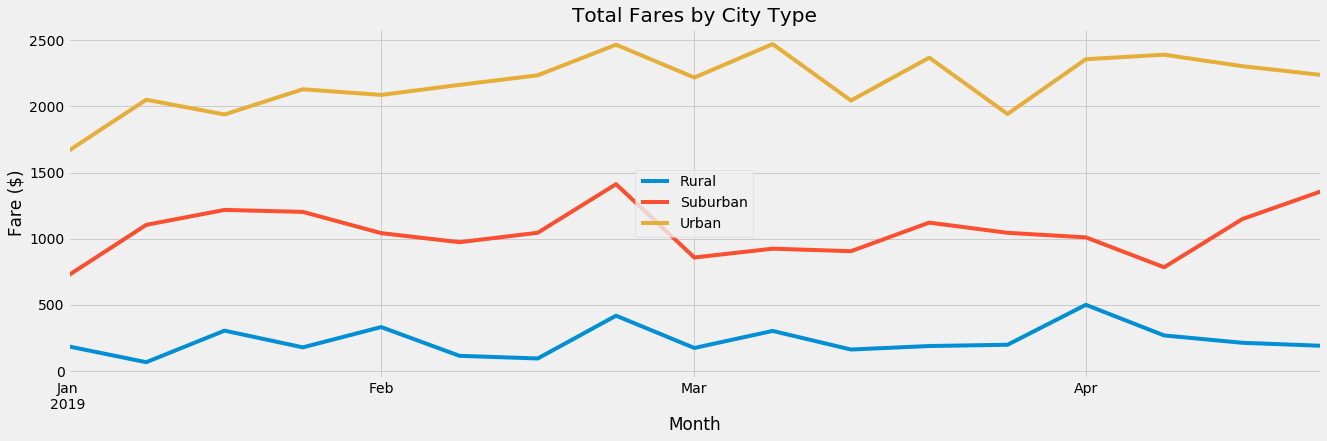

In [44]:
# Use axes plotting to add labels and titles
from matplotlib import style

style.use("fivethirtyeight")
ax = weekly_fares_df.plot(figsize=(20,6))
# add title
plt.title("Total Fares by City Type")
# Add labels
ax.set_ylabel("Fare ($)")
ax.set_xlabel("Month")
plt.legend(loc="best")
plt.savefig("Challenge_Fare_Summary.png")
plt.show()